In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
url= 'https://raw.githubusercontent.com/ShreyaSaha102/Credit-Default-Prediction/refs/heads/main/UCI_Credit_Card.csv'
df= pd.read_csv(url)

In [4]:
print(df.shape)
pd.set_option('display.max_columns', 25)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df1=df.copy()
df1=df1.drop(['ID'], axis=1)
df1['EDUCATION']=df1['EDUCATION'].replace({0:4, 5:4, 6:4})
df1['MARRIAGE']=df1['MARRIAGE'].replace({3:0})
df1.rename(columns={'PAY_0':'PAY_1'},inplace=True)
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df1['TOTAL_BILL']=(df1.iloc[:,11:17]).sum(axis=1)
df1['TOTAL_PAYMENT']= (df1.iloc[:,17:23]).sum(axis=1)
df1['PAY_TO_BILL']= df1.TOTAL_PAYMENT/df1.TOTAL_BILL
df1.head()
#Ratio>1 => customer paying more than billed (clearly paying:Low risk) ;and vice versa

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAYMENT,PAY_TO_BILL
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0,0.089434
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0,0.292791
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0,0.108388
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0,0.036259
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0,0.540054


In [7]:
df1.PAY_TO_BILL.describe()

count    2.920500e+04
mean              inf
std               NaN
min     -5.469286e+02
25%      4.222217e-02
50%      9.313918e-02
75%      6.237201e-01
max               inf
Name: PAY_TO_BILL, dtype: float64

In [8]:
df1.PAY_TO_BILL.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.PAY_TO_BILL=df1.PAY_TO_BILL.fillna(0)

In [9]:
df1.to_csv("Modified_Credit_card.csv")

In [10]:
df2=df1.copy()

In [11]:
float_col=df2.select_dtypes(include=['float64']).columns
df2[float_col]

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL,TOTAL_PAYMENT,PAY_TO_BILL
0,20000.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,7704.0,689.0,0.089434
1,120000.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,17077.0,5000.0,0.292791
2,90000.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,101653.0,11018.0,0.108388
3,50000.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,231334.0,8388.0,0.036259
4,50000.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,109339.0,59049.0,0.540054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,725349.0,42550.0,0.058661
29996,150000.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,21182.0,14490.0,0.684071
29997,30000.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,70496.0,31300.0,0.443997
29998,80000.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,266611.0,147181.0,0.552044


# **LOGISTIC REGRESSION**

In [12]:
from sklearn.preprocessing import StandardScaler

float_col = df2.select_dtypes(include=['float64']).columns

#Applying StandardScaler to float columns
scaler = StandardScaler()
df2[float_col] = scaler.fit_transform(df2[float_col])

categorical_columns = ['SEX','MARRIAGE']

In [13]:
pd.set_option('display.max_columns',80)
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,TOTAL_BILL,TOTAL_PAYMENT,PAY_TO_BILL
0,-1.136720,2,2,1,24,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,-0.690692,-0.509027,-0.038002
1,-0.365981,2,2,2,26,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,-0.665997,-0.438153,-0.011491
2,-0.597202,2,2,2,34,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,-0.443170,-0.339216,-0.035531
3,-0.905498,2,2,1,37,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,-0.101507,-0.382454,-0.044934
4,-0.905498,1,2,1,57,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,-0.422920,0.450421,0.020743


In [14]:
X=df2.drop('default.payment.next.month',axis=1)
Y=df2['default.payment.next.month']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model= LogisticRegression()
model.fit(X_train, Y_train)

#PRediction using moedl
Y_pred= model.predict(X_test)
Y_pred_prob=model.predict_proba(X_test)[:,1]

#Metric calculation
accuracy =accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
auc = roc_auc_score(Y_test, Y_pred_prob)

#Print metrics
print(f"Accuracy: {accuracy: .4f}")
print(f"Precision: {precision: .4f}")
print(f"F1 Score: {f1: .4f}")
print(f"Recall: {recall: .4f}")
print(f"AUC: {auc: .4f}")

Accuracy:  0.8108
Precision:  0.7005
F1 Score:  0.3540
Recall:  0.2369
AUC:  0.7281


In [18]:
from sklearn.model_selection import cross_val_score,cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Cross-validated predictions
y_pred = cross_val_predict(model, X, Y, cv=cv, method='predict')
y_pred_prob = cross_val_predict(model, X, Y, cv=cv, method='predict_proba')[:,1]

#Cross-validated metrics
accuracy = accuracy_score( Y, y_pred)
precision = precision_score(Y, y_pred)
recall = recall_score(Y,y_pred)
f1 = f1_score(Y, y_pred)
auc = roc_auc_score(Y, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.8105
Precision: 0.7136
Recall: 0.239602
F1 Score: 0.3588
AUC: 0.7228


In [19]:
from sklearn.model_selection import GridSearchCV
model=LogisticRegression()

#Parameter grid
param_grid = {
    'penalty': ['l1', 'l2','elasticnet','none'],    #types of regularization
    'C': [0.001, 0.01, 0.1, 1, 10, 100],   #regularization strength
    'solver': ['liblinear', 'saga','lbfgs'],
    'l1_ratio' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]   #needed if penalty is  elasticnet
}

#Cross-val model
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Grid search with cross-val
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc',n_jobs=-1)
grid_search.fit(X,Y)

#Best hyperparameter
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#cross-val prediction using best model
best_model = grid_search.best_estimator_
y_pred = cross_val_predict(best_model, X, Y, cv=cv, method='predict')
y_pred_prob = cross_val_predict(best_model, X, Y, cv=cv, method='predict_proba')[:,1]

#Cross-val metrics
accuracy = accuracy_score(Y, y_pred)
precision = precision_score(Y, y_pred)
f1 = f1_score(Y, y_pred)
recall = recall_score(Y, y_pred)
auc = roc_auc_score(Y, y_pred_prob)

#Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Best Hyperparameters: {'C': 100, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8106
Precision: 0.7126
F1 Score: 0.3598
Recall: 0.2407
AUC: 0.7229


In [20]:
best_model=LogisticRegression(C= 100, l1_ratio= 0.1, penalty= 'l2', solver= 'lbfgs')
best_model.fit(X_train,Y_train)

LogisticRegression(C=100, l1_ratio=0.1)

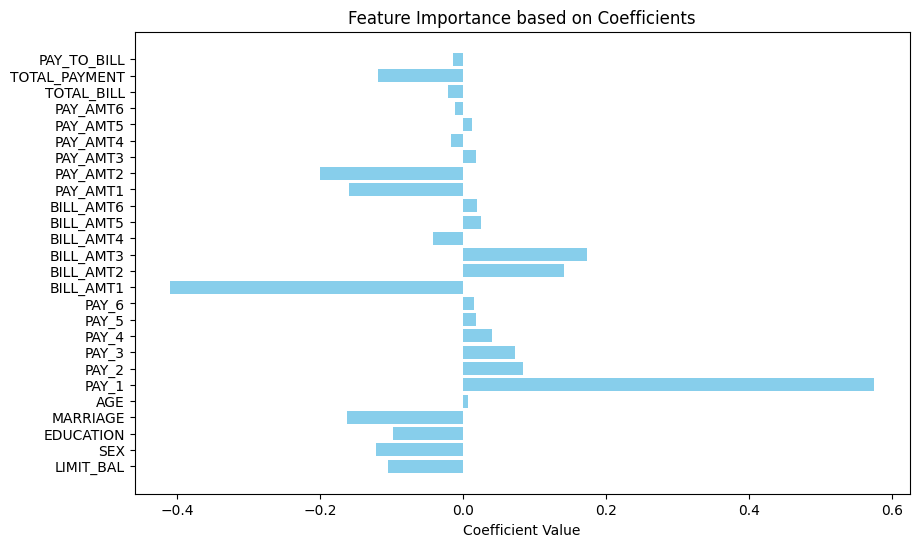

In [21]:
coefficients = best_model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Coefficients')
plt.show()

# **LOGISITC REGRESSION WITH SMOTE**

In [22]:
X= df2.drop('default.payment.next.month', axis=1)
Y= df2['default.payment.next.month']

X_train, X_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state= 42)
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TOTAL_BILL,TOTAL_PAYMENT,PAY_TO_BILL
0,-1.136720,2,2,1,24,2,2,-1,-1,-2,-2,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-0.690692,-0.509027,-0.038002
1,-0.365981,2,2,2,26,-1,2,0,0,0,2,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-0.665997,-0.438153,-0.011491
2,-0.597202,2,2,2,34,0,0,0,0,0,0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.443170,-0.339216,-0.035531
3,-0.905498,2,2,1,37,0,0,0,0,0,0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.101507,-0.382454,-0.044934
4,-0.905498,1,2,1,57,-1,0,-1,0,0,0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.422920,0.450421,0.020743


In [23]:
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[1,2,3,5,6,7,8,9,10])
X_smotenc, y_smotenc = sm.fit_resample(X_train, y_train)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

model = LogisticRegression()
model.fit(X_smotenc, y_smotenc)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba= model.predict_proba(X_test)[:,1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.6715
Precision: 0.3652
F1 Score: 0.4748
Recall: 0.6786
AUC: 0.7334


In [25]:
model = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga', 'liblinear'],
    'l1_ratio': [0, 0.5, 1]  # l1_ratio is only used if penalty is 'elasticnet'
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_smotenc, y_smotenc)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Fit the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

Best parameters found: {'C': 100, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.6722
Precision: 0.3658
F1 Score: 0.4753
Recall: 0.6786
AUC: 0.7333


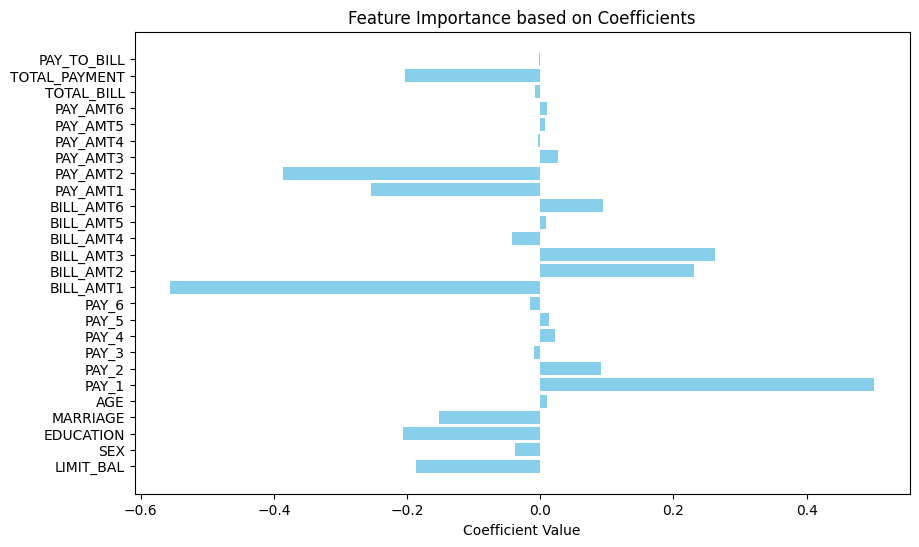

In [26]:
best_smote_model= LogisticRegression()
best_smote_model.fit(X_smotenc, y_smotenc)

coefficients = best_smote_model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance based on Coefficients')
plt.show()